In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


Análise: Quais varíaveis estão relacionado com o número de casos e mortes de Covid-19

In [53]:
raw_data = pd.read_csv("/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/raw_data.csv")
trans_data = pd.read_csv("/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv")
# Remover as colunas 
raw_data = raw_data.drop(columns=['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])


In [54]:
raw_data.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [55]:
raw_data.tail()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535
50417,ZWE,Zimbabwe,2020-10-19,8147.0,231.0,76.85,14862927,1899.775,0.535


In [56]:
trans_data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [65]:
trans_data.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491
50417,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491


**Análise da evolução dos casos e mortes por COVID-19:**

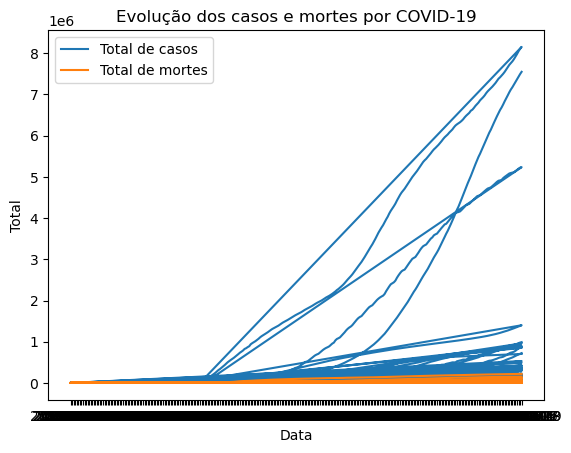

In [57]:
# Plotar a evolução dos casos e mortes por COVID-19 globalmente
plt.plot(raw_data['date'], raw_data['total_cases'], label='Total de casos')
plt.plot(raw_data['date'], raw_data['total_deaths'], label='Total de mortes')
plt.xlabel('Data')
plt.ylabel('Total')
plt.title('Evolução dos casos e mortes por COVID-19')
plt.legend()
plt.show()

Evolução de casos em alguns países

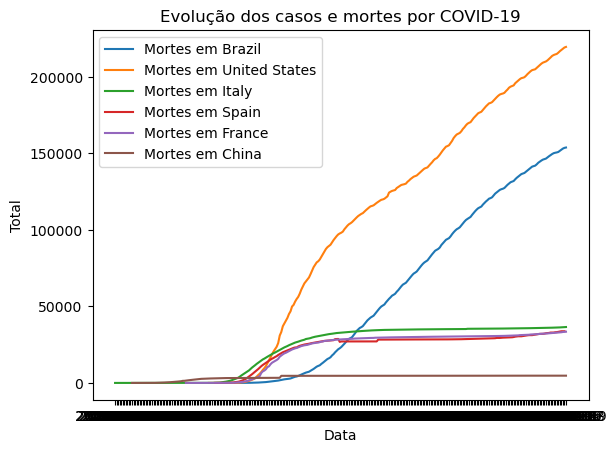

In [58]:
# Selecionar os dados dos países Brazil, United States e Italy
countries = ['Brazil', 'United States', 'Italy','Spain','France','China']
selected_data = raw_data[raw_data['location'].isin(countries)]

# Plotar a evolução dos casos e mortes por COVID-19 para cada país selecionado
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    #plt.plot(country_data['date'], country_data['total_cases'], label='Casos em {}'.format(country))
    plt.plot(country_data['date'], country_data['total_deaths'], label='Mortes em {}'.format(country))

plt.xlabel('Data')
plt.ylabel('Total')
plt.title('Evolução dos casos e mortes por COVID-19')
plt.legend()
plt.show()

**Análise da resposta governamental**

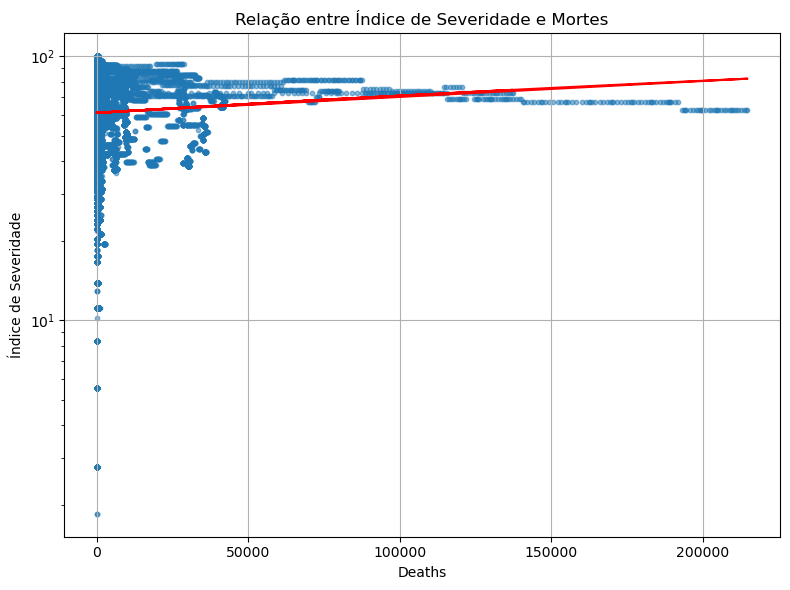

Correlação entre o Índice de Severidade e Total de Casos:  0.06325906749258024
Correlação entre o Índice de Severidade e Total de Mortes:  0.056271622245599826


In [79]:
# Remover valores nulos
filtered_data = raw_data.dropna(subset=['total_deaths', 'stringency_index'])

plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['total_deaths'], filtered_data['stringency_index'], s=10, alpha=0.5)
plt.xlabel('Deaths')
plt.ylabel('Índice de Severidade')
plt.title('Relação entre Índice de Severidade e Mortes')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()

# Adicionar linha de tendência
z = np.polyfit(filtered_data['total_deaths'], filtered_data['stringency_index'], 1)
p = np.poly1d(z)
plt.plot(filtered_data['total_deaths'], p(filtered_data['total_deaths']), color='red')

plt.show()

###

# Calcular a correlação entre o índice de severidade e os casos/mortes
correlation_cases = raw_data['stringency_index'].corr(raw_data['total_cases'])
correlation_deaths = raw_data['stringency_index'].corr(raw_data['total_deaths'])
print("Correlação entre o Índice de Severidade e Total de Casos: ", correlation_cases)
print("Correlação entre o Índice de Severidade e Total de Mortes: ", correlation_deaths)


In [76]:
import statsmodels.api as sm

# Preparar os dados para o modelo de regressão causal
data = raw_data[['stringency_index', 'total_cases']]
data.dropna(inplace=True)  # Remover linhas com valores ausentes

# Ajustar o modelo de regressão causal
X = data[['stringency_index']]
X = sm.add_constant(X)  # Adicionar constante para o termo de interceptação
y = data['total_cases']

model = sm.OLS(y, X)
results = model.fit()

# Exibir os resultados do modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     162.8
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.22e-37
Time:                        21:43:40   Log-Likelihood:            -5.7953e+05
No. Observations:               40529   AIC:                         1.159e+06
Df Residuals:                   40527   BIC:                         1.159e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9184.2667   5051.679  

/tmp/ipykernel_32/2780481707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Remover linhas com valores ausentes


In [70]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


Como a varíavel Severidade é muito importante para análise sera importante fazermos estudos com Regressão Causal

In [76]:
import statsmodels.api as sm

# Preparar os dados para o modelo de regressão causal
data = raw_data[['stringency_index', 'total_cases']]
data.dropna(inplace=True)  # Remover linhas com valores ausentes

# Ajustar o modelo de regressão causal
X = data[['stringency_index']]
X = sm.add_constant(X)  # Adicionar constante para o termo de interceptação
y = data['total_cases']

model = sm.OLS(y, X)
results = model.fit()

# Exibir os resultados do modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     162.8
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.22e-37
Time:                        21:43:40   Log-Likelihood:            -5.7953e+05
No. Observations:               40529   AIC:                         1.159e+06
Df Residuals:                   40527   BIC:                         1.159e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9184.2667   5051.679  

/tmp/ipykernel_32/2780481707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Remover linhas com valores ausentes


Resultado da regressão linear utilizando o método dos mínimos quadrados ordinários (OLS):

R-squared (R-quadrado): O R-quadrado mede a proporção da variabilidade da variável dependente (total_cases) que pode ser explicada pelas variáveis independentes (stringency_index): O valor de R-quadrado é de 0.004, o que indica que apenas cerca de 0.4% da variabilidade dos casos totais de COVID-19 é explicada pelas variáveis independentes (stringency_index). **Esse valor é muito baixo, sugerindo que o modelo de regressão linear não é capaz de explicar adequadamente os casos totais.**

Coeficientes: Os coeficientes representam a inclinação da linha de regressão para cada uma das variáveis independentes:  O coeficiente para a variável stringency_index é de 998.6838. Isso significa que, para cada aumento de uma unidade no índice de severidade, espera-se um aumento de aproximadamente 998.68 nos casos totais de COVID-19. O coeficiente para a constante (const) é de 9184.2667.

P-values (valor p): Os valores p medem a significância estatística dos coeficientes estimados Um valor p menor que 0.05 (ou outro limiar de significância escolhido) indica que o coeficiente é estatisticamente significativo: O valor p para a variável stringency_index é muito pequeno (0.000), indicando que o coeficiente é estatisticamente significativo.

AIC (Critério de Informação de Akaike) e BIC (Critério de Informação Bayesiano)=> Esses critérios são usados para comparar modelos e selecionar o melhor modelo entre várias opções. Quanto menor o valor do AIC e BIC, melhor é o modelo: Os valores de AIC e BIC são 1.159e+06, indicando a adequação do modelo em termos de ajuste aos dados.

Omnibus, Prob(Omnibus), Jarque-Bera (JB) e Prob(JB): Essas estatísticas testam a normalidade dos resíduos do modelo. Um valor pequeno de Prob(Omnibus) e Prob(JB) indica que os resíduos não são normalmente distribuídos: **os valores são muito pequenos (0.000), indicando que os resíduos não seguem uma distribuição normal.
**

Durbin-Watson: Essa estatística testa a presença de autocorrelação nos resíduos. Valores próximos a 2 indicam que não há autocorrelação:  O valor de Durbin-Watson é próximo de 0.023, o que sugere a presença de autocorrelação positiva nos resíduos do modelo.

**Análise da relação entre Mortes e IDH**

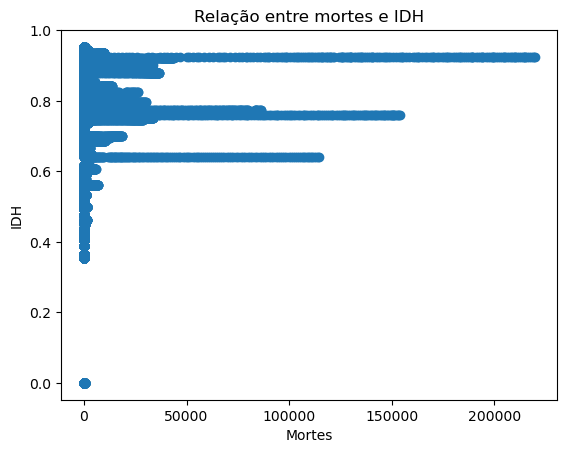

Correlação entre o HDI e Total de Casos:  0.09169181057921974
Correlação entre o HDI e Total de Mortes:  0.15295891332483544


In [60]:
# Plotar a relação entre população e PIB per capita
plt.scatter(raw_data['total_deaths'], raw_data['human_development_index'])
plt.xlabel('Mortes')
plt.ylabel('IDH')
plt.title('Relação entre mortes e IDH')
plt.show()

# Calcular a correlação entre o HDI e os casos/mortes
correlation_cases = raw_data['human_development_index'].corr(raw_data['total_cases'])
correlation_deaths = raw_data['human_development_index'].corr(raw_data['total_deaths'])
print("Correlação entre o HDI e Total de Casos: ", correlation_cases)
print("Correlação entre o HDI e Total de Mortes: ", correlation_deaths)


não há uma relação linear forte entre o IDH de um país e o número de mortes por COVID-19. 

Ou seja, Paises com alto IDH não tiveram muitas mortes

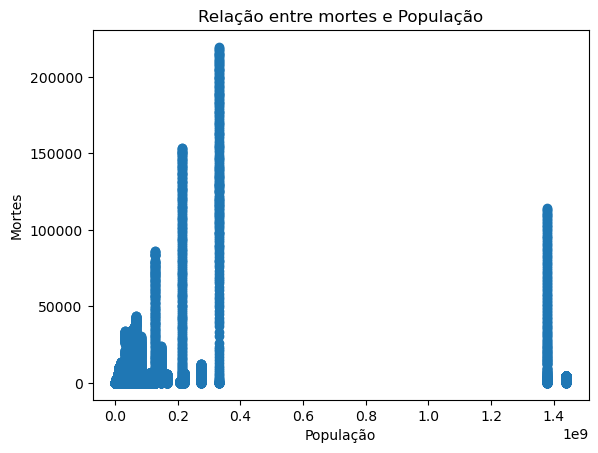

Correlação entre o População e Total de Casos:  0.3009099700974437
Correlação entre o População e Total de Mortes:  0.2551075213925896


In [61]:
# Plotar a relação entre população e Numero de mortes
plt.scatter(raw_data['population'], raw_data['total_deaths'])
plt.xlabel('População')
plt.ylabel('Mortes')
plt.title('Relação entre mortes e População')
plt.show()

# Calcular a correlação entre o HDI e os casos/mortes
correlation_cases = raw_data['population'].corr(raw_data['total_cases'])
correlation_deaths = raw_data['population'].corr(raw_data['total_deaths'])
print("Correlação entre o População e Total de Casos: ", correlation_cases)
print("Correlação entre o População e Total de Mortes: ", correlation_deaths)

Com todas as variáveis

In [77]:
# Preparar os dados para o modelo de regressão causal
data = raw_data[['stringency_index', 'total_cases', 'human_development_index','population']]
data.dropna(inplace=True)  # Remover linhas com valores ausentes

# Ajustar o modelo de regressão causal
X = data[['stringency_index', 'human_development_index']]
X = sm.add_constant(X)  # Adicionar constante para o termo de interceptação
y = data['total_cases']

model = sm.OLS(y, X)
results = model.fit()

# Exibir os resultados do modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     274.3
Date:                Thu, 25 May 2023   Prob (F-statistic):          5.42e-119
Time:                        21:59:34   Log-Likelihood:            -5.3375e+05
No. Observations:               37234   AIC:                         1.067e+06
Df Residuals:                   37231   BIC:                         1.068e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

/tmp/ipykernel_32/2727419067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Remover linhas com valores ausentes


##### Resultado da regressão linear utilizando o método dos mínimos quadrados ordinários (OLS):

R-squared (R-quadrado): O R-quadrado mede a proporção da variabilidade da variável dependente (total_cases) que pode ser explicada pelas variáveis independentes (stringency_index): O valor de R-quadrado é de 0.015, o que indica que apenas cerca de 1.4% da variabilidade dos casos totais de COVID-19 é explicada pelas variáveis independentes 

Coeficientes: Os coeficientes representam a inclinação da linha de regressão para cada uma das variáveis independentes: O coeficiente para as variáveis  é de -1.902e+05. ########

P-values (valor p): Os valores p medem a significância estatística dos coeficientes estimados Um valor p menor que 0.05 (ou outro limiar de significância escolhido) indica que o coeficiente é estatisticamente significativo: O valor p para as variáveis stringency_index é muito pequeno (0.000), indicando que o coeficiente é estatisticamente significativo.

AIC (Critério de Informação de Akaike) e BIC (Critério de Informação Bayesiano)=> Esses critérios são usados para comparar modelos e selecionar o melhor modelo entre várias opções. Quanto menor o valor do AIC e BIC, melhor é o modelo: Os valores de AIC e BIC indicam a adequação do modelo em termos de ajuste aos dados.

Omnibus, Prob(Omnibus), Jarque-Bera (JB) e Prob(JB): As estatísticas Omnibus e Jarque-Bera testam a normalidade dos resíduos do modelo. Nesse caso, os valores são muito pequenos (0.000), indicando que os resíduos não seguem uma distribuição normal.


Conclusão: Não é possivel determinar com os dados presentes